<a id='top'></a>
# Shell Model Tutorial

This notebook serves as an overview of the functionality of the ShellModel library. This code uses a finite-element-analysis approach to track hydrodyamics of particles within fluids of a generalized tensor viscosity (such as liquid crystals). By the end of the tutorial you should be able to form your colloidal particles, compute their hydrodynamic properties, include independently interacting particles, and collect output movies.

## 1. [Importing with Git](#git)

Learn the basics of how this code is organized and how to bring it into your own notebooks.

## 2. [Making Collections](#collections)

The essence of the "Shell Model": create objects out of spheres to move through a fluid.

## 3. [The Analyzer Class](#analyzer)

Compute the hydrodynamic properties of collections within a specified fluid.

## 4. [Particle Arrays](#arrays)

Stitch together several collections into an array of particles, step the particles through time to track motion.

## 5. [Making Movies](#movies)

Step back and take a wider view of your sedimentation experiments, visualize them through movies and stills.

## 6. [Things to Come](#wip)

<a id='git'></a>
# 1. Importing with Git  
###### [back to top](#top)

The Shell Model functions off of five python scripts/classes contained in the ShellModel [repository](https://github.com/johnemmanuelbond/ShellModel).

[supports.py](https://github.com/johnemmanuelbond/ShellModel/blob/master/supports.py) contains a list of imports (mpl, numpy, etc.) and several quality of life functions that the other classes use frequently. 

[Collections.py](https://github.com/johnemmanuelbond/ShellModel/blob/master/Collections.py) is a class to represent a rigid collection of spheres. The class contains code to form a collection out of coordinates, translate, rotate, clone, or merge collections, as well as several preset collections: spheres, cylinders, disks, and (newly) helices.

[Analyzer.py](https://github.com/johnemmanuelbond/ShellModel/blob/master/Analyzer.py) is a class containing the math used to compute translational and rotational (wip) drag tensors for these collection objects.

[ParticleArray.py](https://github.com/johnemmanuelbond/ShellModel/blob/master/ParticleArray.py) is a class which allows a user to have several collection objects move independently of each other, but still affect each other hydrodynamically via Analyzer.py.

[ArrayMovie.py](https://github.com/johnemmanuelbond/ShellModel/blob/master/ArrayMovie.py) is a class which uses the functionality of ParticleArray to track the movement of the array over time and turn it into an mp4 or series of stills which best describe the motion.

In order to access these classes you will need to download git, and, if you would like, clone the [repository](https://github.com/johnemmanuelbond/ShellModel) into a directory of your choice. However, I will teach you how to do it all directly from a jupyter notebook.

Below is the snippet of code I recommend using. It uses the os package to set up a folder called "ShellModel" to contain the aforementioned five files. This code doesn't attempt to clone the directory if you already have it, and imports all the classes/functions/definitions from all the five files so you don't need to call them in an awkward way.

In [2]:
import os

gitPath = os.getcwd() + "\\ShellModel"
workPath = os.getcwd()

if(os.path.isdir(gitPath)!=True):
    !git clone https://github.com/johnemmanuelbond/ShellModel
        
os.chdir(gitPath)
from supports import *
from Collections import *
from Analyzer import *
from ParticleArray import *
from ArrayMovie import *
os.chdir(workPath)

Cloning into 'ShellModel'...


One caveat, every time you pull the code or edit your local versions of them, you should restart the kernel and rerun the above cell so that the kernel uses the updated code. If you would ever like to contribute to this growing library through pushes or new branches, you can contact johnemmanuelbond@gmail.com about getting a security key.

In [2]:
# code used for importing into this notebook on my PC

import os

gitPath = "C:\\Users\\johne\\Physics Research\\Liquid Crystals\\PythonClasses"
workPath = "C:\\Users\\johne\\Physics Research\\Liquid Crystals\\ShellModelNotebooks"

os.chdir(gitPath)
from supports import *
from Collections import *
from Analyzer import *
from ParticleArray import *
from ArrayMovie import *
os.chdir(workPath)

<a id='collections'></a>
# 2. Collections
###### [back to top](#top)

The basic premise of the shell model is to use the well-known hydrodynamics of spheres to compute the hydrodynamic properties (namely the drag tensor) for other shapes, by composing them out of spheres. The [Collections](https://github.com/johnemmanuelbond/ShellModel/blob/master/Collections.py) class exists to create and manipulate these collections of spheres in order to create colloidal particles for further experiments.

The most basic collection object takes in a Nx3 array of cartesian points and creates an object out of it. The collections class also contains useful methods to add points, visualize a collection, or translate\rotate the object.

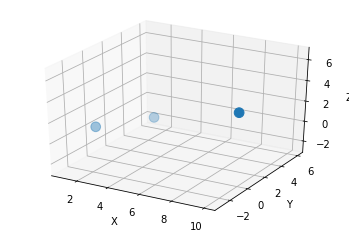

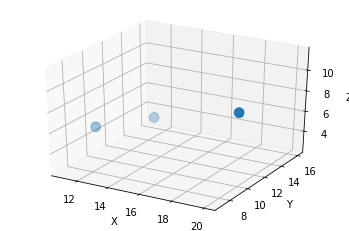

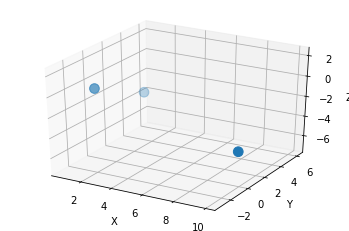

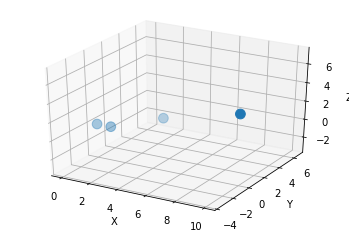

In [3]:
points = np.array([[1,0,0],[3,3,0],[10,0,4]])

test = Collection(points)
test.visualize()

test1 = test.copy()
test1.translate(np.array([10,10,5]))
test1.visualize()

# by default the rotate method acts about the x-axis, you can specify
# the axis with the labels 'x','y','z' or 1,2,3
test2 = test.copy()
test2.rotate(np.pi/4, axis='y')
test2.visualize()

test3=test.copy()
test3.add(np.array([0,0,0]))
test3.visualize()

You can also specify the radius of the constituent spheres by using the kwarg 'a' in your object call, though this does not affect the visualizations. For example, test4 = Collection(points, a=3). The default value for 'a' is 1.

The Collections class also extends several subclasses to make more common shapes. For example, a sphere is specified by a relative radius which parameterizes how many constituent spheres it takes to reach the radius of the larger sphere. A sphere is formed by forming a 3D array of close-packed spheres, and then eliminating the spheres that are not close to spherical surface defined by the relative radius parameter. The Sphere class also has methods to compute the physical radius of the sphere, as well as the density of spheres on the surface.

Sphere 1:
10.853379241009447
0.8971359375804755
Sphere 2:
20.758804330286765
0.976510487383115


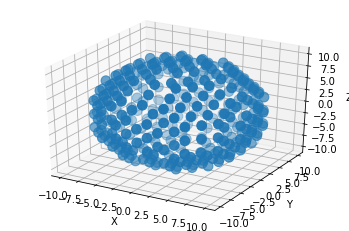

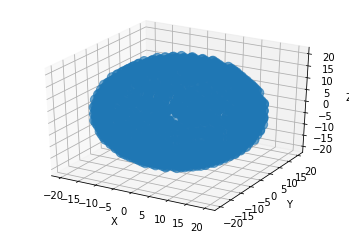

In [4]:
s1=Sphere(5)
s1.visualize()
print("Sphere 1:")
print(s1.radius())
print(s1.surfaceDensity())

s2 = Sphere(10)
s2.visualize()
print("Sphere 2:")
print(s2.radius())
print(s2.surfaceDensity())

Another shape, the cylinder class, is made up of stacked rings of spheres. The rings may be staggered ('B') or directly stacked ('A', default), specifiy this with the kwarg 'mode'. To instantiate a cylinder you must specifify first a "spheres per ring", 's', and then a number of rings 'Nr'. The cylinder class does not create caps for these cylinders as it has been found the caps have little effect on the hydrodynamic properties of thin cylinders. The cylinder class also has methods to compute the physical radius and length of the cylinder, the aspect ratio, as well as the density of spheres on the surface.

Cylinder 1
3.7019190815875014
0.14729468019021508
Cylinder 3
9.442719099991587
0.1878569276239893


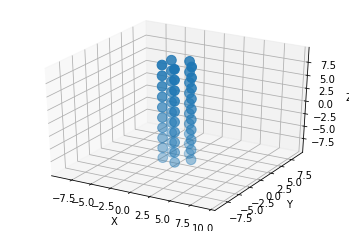

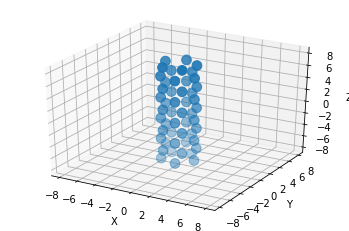

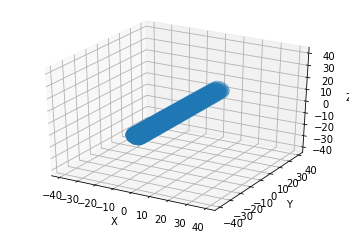

In [5]:
cyl1 = Cylinder(5,10)
cyl1.visualize()
print("Cylinder 1")
print(cyl1.aspectRatio())
print(cyl1.surfaceDensity())

cyl2 = Cylinder(5,10,mode='B')
cyl2.visualize()

cyl3 = Cylinder(10,40)
cyl3.rotate(np.pi/2)
cyl3.visualize()
print("Cylinder 3")
print(cyl3.aspectRatio())
print(cyl3.surfaceDensity())

The Collections class also contains a disc object, specified with the same parameters as the cylinder object, except with close-packed caps. There are also methods to calcualte the physical width and radius, as well as the aspect ratio of the disc.

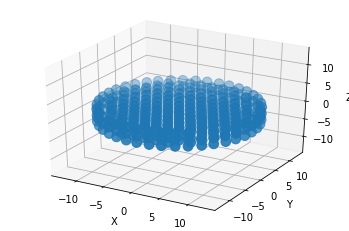

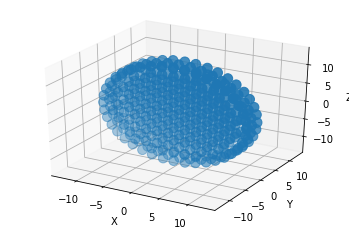

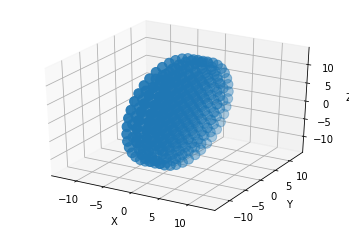

In [6]:
d1 = Disc(40,3,mode='B')
d1.visualize()
d1.rotate(np.pi/2,axis='x')
d1.visualize()
d1.rotate(np.pi/2,axis='z')
d1.visualize()

Lastly, there is the helix class. Use the kwarg 'mode' to indicate the chirality of the helix ('L' or 'R', default). Specify a helix with a number of spheres per turn, 's', a pitch, 'p', and a number of pitches 'Np'. The helix class also has methods to compute the physical radius and length, as well as the aspect ratio.

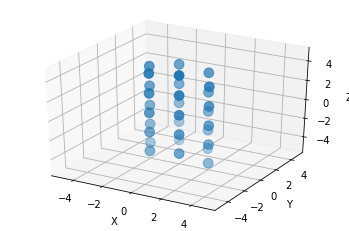

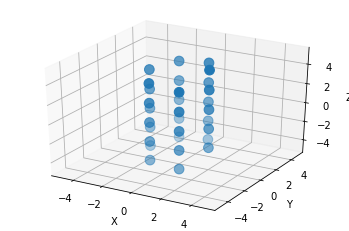

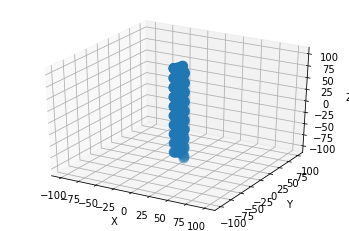

In [7]:
h1 = Helix(6, 2, 5)
h1.visualize()

h2 = Helix(6, 2, 5, mode = 'L')
h2.visualize()

h3 = Helix(20, 20, 10)
h3.visualize()

Use all the functionality of the collections class, as well as the merge method, to create all kinds of 3D objects.

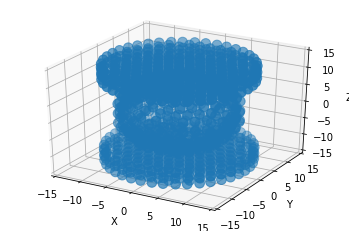

In [8]:
bun1 = d1.copy()
bun2 = d1.copy()
patty = s1.copy()
bun1.translate(np.array([0,0,12]))
bun2.translate(np.array([0,0,-12]))

buns = merge(bun1,bun2)
burger = merge(buns,patty)

burger.visualize()

<a id='analyzer'></a>
# 3. The Analyzer Class
###### [back to top](#top)

The [Analyzer](https://github.com/johnemmanuelbond/ShellModel/blob/master/Analyzer.py) class contains all the math necessary for computing the instantaneous hydrodynamic properties of collections. The class uses the modified Oseen Tensor for unequal elements:
$$
\begin{equation*}
    T_{ij}^{\alpha\beta} = \frac{1}{8\pi\eta_0R_{ij}}\bigg[c_1\delta_{\alpha\beta}+c_2\frac{R^\alpha_{ij}R^\beta_{ij}}{R^2_{ij}}\bigg]
\end{equation*}
$$

to calculate the hydrodynamic interaction tensor for each of the constituent spheres.  The vector $R_{ij}$ is joins spheres $i$ and $j$, $c1$ and $c2$ are given by combinations of $R_{ij}$'s and and the $i$th sphere's radius $\sigma_i$, and $\alpha$ and $\beta$ simply index the coordinates. The code then uses this tensor to compute the shielding tensor of each of the constituent spheres, which contains the information on how the effects of the surrounding spheres shield each constituent sphere from flow. The drag tensor for the collection, $\Xi$, is then the sum of the shielding tensors dotted into the stokesian drag tensors for each constituent sphere, $\zeta_i = 6\pi\eta_0\sigma_i$, where $\eta_0$ is the viscosity tensor for the fluid. The class computes the shielding tensors, $G_i$, by solving the equation:

$$
\begin{equation*}
    G_i + \sum_j\zeta_jT_{ij}G_j = I
\end{equation*}
$$

The Analyzer class has a method for each step in this process, and it can be applied to any collection object. To instantiate an analyzer object simply a collection with which to compute, and a tensor viscosity 'eta'. If you choose to write $\eta_0$ in it's principal axes, you may also specify an angle, using the kwarg 'theta', by which to rotate the viscosity tensor about an axis, given by the kwarg 'ax'. Alternatively you can rotate the collection before inputting it into analyzer.

In [9]:
ana = Analyzer(cyl1, np.eye(3))
print("Compute (some of) the hydrodynamic interaction tensor, T")
print(ana.getT()[:10,0])
print("Compute (some of) the shielding tensors, G")
print(ana.getShielding()[:10])
print("Compute the drag tensor, Xi")
print(ana.getXi())

Compute (some of) the hydrodynamic interaction tensor, T
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.0232101  0.         0.        ]
  [0.         0.0232101  0.        ]
  [0.         0.         0.03315728]]

 [[0.01036165 0.         0.        ]
  [0.         0.01036165 0.        ]
  [0.         0.         0.01906544]]

 [[0.00675426 0.         0.        ]
  [0.         0.00675426 0.        ]
  [0.         0.         0.0130173 ]]

 [[0.0050254  0.         0.        ]
  [0.         0.0050254  0.        ]
  [0.         0.         0.00984357]]

 [[0.0040054  0.         0.        ]
  [0.         0.0040054  0.        ]
  [0.         0.         0.0079047 ]]

 [[0.00333108 0.         0.        ]
  [0.         0.00333108 0.        ]
  [0.         0.         0.00660075]]

 [[0.00285172 0.         0.        ]
  [0.         0.00285172 0.        ]
  [0.         0.         0.00566477]]

 [[0.00249327 0.         0.        ]
  

Using these methods, you can do things like compute the drag tensors for a cylinder rotated to several angles within a liquid crystal:

In [10]:
# testing out how easy this code is to run inside a loop so I can set up multiple calculations at once to save time.
# this proof of concept right here is why I decided to overhaul the project into python

#system parameters
aspect = 3.7
anis = 0.8

#computing cylinder parameters
s = 5
Nr = int(np.round(aspect*(1/np.sin(np.pi/s)+1)))

#creating cylinder object and viscosity tensor
cyl = Cylinder(s,Nr)
eta = np.array([[1,0,0],[0,1,0],[0,0,anis]])

#I'm using 10 degree increments over a 180 degree range so I need a length 19 indexing array
ind = np.arange(19)

#create an array to hold drag tensors
drags = np.zeros((19,3,3))

for i in ind:
    an = Analyzer(cyl, eta, theta = i*np.pi/18)
    print("theta = " + str(i*10) + " degrees")
    x = an.getXi()
    drags[i] = x
    print(x)

theta = 0 degrees
[[105.51933339  -0.           0.        ]
 [  0.         105.51933112   0.        ]
 [  0.           0.          65.91697969]]
theta = 10 degrees
[[105.51933037  -0.           0.        ]
 [ -0.         104.88296867   2.81811994]
 [  0.           3.60897296  66.41389196]]
theta = 20 degrees
[[105.51933037   0.           0.        ]
 [  0.         103.0506428    5.29633442]
 [  0.           6.78264969  67.8446881 ]]
theta = 30 degrees
[[105.51933112   0.          -0.        ]
 [  0.         100.24336235   7.13572068]
 [  0.           9.1382413   70.03678823]]
theta = 40 degrees
[[105.51933075  -0.           0.        ]
 [ -0.          96.79971831   8.11444512]
 [ -0.          10.39162646  72.72580684]]
theta = 50 degrees
[[105.51932999   0.          -0.        ]
 [  0.          93.13506625   8.11444179]
 [  0.          10.39162638  75.58739767]]
theta = 60 degrees
[[105.51933075  -0.           0.        ]
 [ -0.          89.69142511   7.13572021]
 [  0.           9.138

(WIP) The class also has functionality to compute the rotational drag tensor. $\Theta$, by considering both the internal rotation of the consituent spheres necessary in order to keep the collection rigid, as well as the movement of the consituent spheres about each axis. (for simplicity all axes are assumed to go through the origin of the collection's coordinate system).

In [11]:
print(ana.getTheta())

[[4913.84007258   -0.            0.        ]
 [   0.         4913.84039852    0.        ]
 [   0.            0.          516.00539407]]


<a id='arrays'></a>
# 4. Particle Arrays
###### [back to top](#top)

[ParticleArray.py](https://github.com/johnemmanuelbond/ShellModel/blob/master/ParticleArray.py) is a class that contains the necessary logic for sedimenting an array of identical particles through a fluid. The class works by taking in a matrix of initial positions, translating several collections to those parameters, and then merging them all together. The Analyzer class can then evaluate the hydrodynamic interactions between each of the particles, and calculate the resultant drag tensors. With these drag tensors, it is trivial to use them to timestep the array forward under a sedimentation force and repeat the process. To instantiate a ParticleArray specify a Nx3 matrix of initial positions of the particles, a Collection object to represent the colloidal particle, a tensor viscosity written in the axes of your coordinate system (you must rotate it yourself) and a vector sedimentation force written in the same axes.

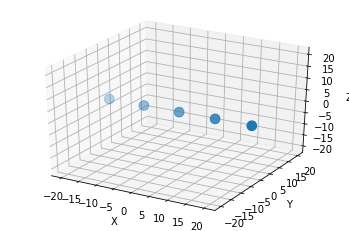

In [12]:
ps = np.transpose([np.arange(5)-2,np.zeros(5),np.zeros(5)])*10

# the particle in question is one sphere.
pt = Collection(np.array([[0,0,0]]))
fExt = np.array([0,0,-1])
eta = np.eye(3)

pArr = ParticleArray(ps, pt, eta, fExt)

pArr.formUp(vis=True)

To visualize a ParticleArray, use the formUp() method with the kwarg 'vis' set to true. The formUp() method is the piece of code that creates the larger collection out of the individual particles and positions matrix. Use the timestep() method with an argument dt to step an array forward by that amount of time. The 'considerClumping' kwarg activates a piece of code that prevents any two constituent spheres from overlapping at any point. You can call the position matrix 'ps' to track the positions of your particles as time progresses, though the MovieMaker class automates this process.

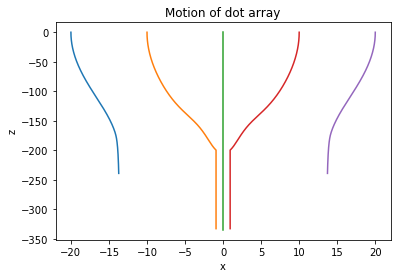

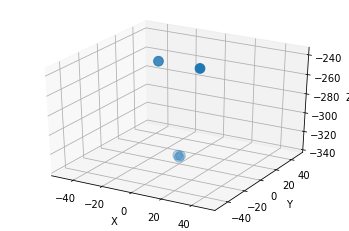

In [13]:
steps=400

ind = np.arange(steps)
dt = 10

allps = np.zeros((steps,5,3))

for i in ind:
    pArr.formUp()
    allps[i] = pArr.ps
    pArr.timestep(dt, considerClumping=True)

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title('Motion of dot array')

#plotting in the x-z plane
for i in np.arange(5):
    plt.plot(allps[:,i,0],allps[:,i,2])
    
pArr.formUp(vis=True)

Rotation is still a work in progress, though the bare bones are there and usable to a qualitative level. These ShellModel particles rotate because each of the consituent spheres feels a different drag force due to asymmetry in the hydrodynamic interactions between particles. However, the constituent speres are rigidly stuch together, so these drag forces can result in a net torque. In low Reynolds Number a net torque must be cancelled by a particle's rotation, so if we can find the net torque we can use the rotational drag tensors to get an instantaneuous angular velocity vector, and then timestep that along with the linear velocity. When instantiating a ParticleArray, you may also use the kwarg 'orientations' to specify a Nx3 matrix of euler angles to set the intial orientations, the default is all zeroes. There is a method getThetas() to find the rotational drag tensor for each of the particles, and a method getNus() which returns a set of tensors that, when acting on a velocity vector, return the resultant torque. You can store the orientations as time steps by calling the 'os' matrix from your ParticleArray object.

Combine all of these to track the motion of a large array of anisotropic particles.

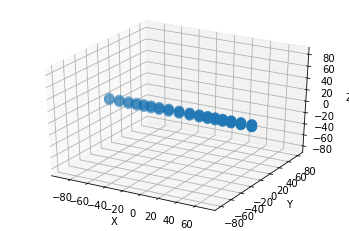

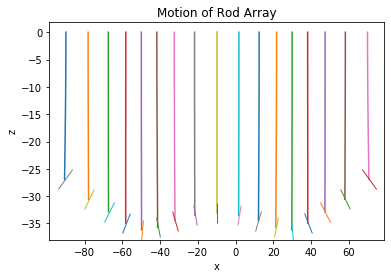

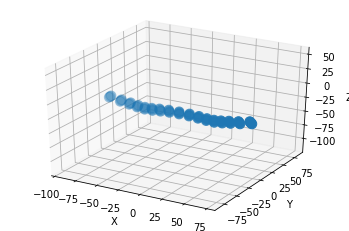

In [14]:
# testing timestepping with an anisotropic particle

N = 17

d = 10
qd = np.pi/4

# intial positons are a 'density wave'
pert = (d/4*np.sin(np.arange(N)*qd)).round(8)
ps = np.transpose([d*(np.arange(N)-(N+1)/2)+pert,np.zeros(N),np.zeros(N)])

#pt instantiates three spheres to represent a rod.
pt = Collection(np.array([[0,0,2],[0,0,0],[0,0,-2]]))
fExt = np.array([0,0,-1])
eta = np.eye(3)

pArr = ParticleArray(ps, pt, eta, fExt)

pArr.formUp(vis=True)

steps=120

ind = np.arange(steps)
dt = 5

allps = np.zeros((steps,N,3))
allos = np.zeros((steps,N,3))

for i in ind:
    pArr.formUp()
    allps[i] = pArr.ps
    allos[i] = pArr.os
    pArr.timestep(dt)
    
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title('Motion of Rod Array')

for i in np.arange(N):
    plt.plot(allps[:,i,0],allps[:,i,2])

#plots the final orientations of the rods.
for i in np.arange(N):
    o = allos[-1,i,1]
    rod = mp.path.Path(np.array([[np.sin(o),np.cos(o)],[-np.sin(o),-np.cos(o)]]))
    plt.plot(allps[-1,i,0],allps[-1,i,2], linestyle = 'none', marker = rod, markersize = 20)
    
pArr.formUp(vis=True)

<a id='movies'></a>
# 5. Making Movies
###### [back to top](#top)

The [ArrayMovie](https://github.com/johnemmanuelbond/ShellModel/blob/master/ArrayMovie.py) class essentially performs a sedimentation experiment. ArrayMovie wraps around a ParticleArray instance and uses the timestep() method to progress the array through time. The ArrayMovie class has several built in methods to visualize a sedimentation experiment. To instantiate an ArrayMovie, construct a ParticleArray with your initial conditions, and specify a number of steps, as well as a step size. The kwarg 'title' allows you to specify the name of any output figures/files. The kwarg 'axis' allows you to choose your viewing angle for any figures/files (default is 'y'). The kwarg 'isIso' allows you to specify whether particles are isotropic, for use in later plotting methods (default is False). Use the .simulate() method to run the simulation, though calling most other methods will also call .simulate()

In [22]:
d=6

pert = np.array([[0,0,0],[d/4,0,0],[0,0,0]])
ps = np.array([[-d,0,0],[0,0,0],[d,0,0]])
pt = Collection(np.array([[0,0,0]]))
fExt = np.array([0,0,-1])
eta1 = np.eye(3)
eta2 = rMat(np.array([[1,0,0],[0,1,0],[0,0,0.8]]),np.pi/3,axis='y')

pArr1 = ParticleArray(ps+pert, pt, eta2, fExt)
pArr2 = ParticleArray(ps-pert, pt, eta2, fExt)
pArr3 = ParticleArray(ps+pert, pt, eta1, fExt)

movie1 = ArrayMovie(pArr1, 500, 5, isIso=True, title = "3Spheres_LC_SlightRight")
movie2 = ArrayMovie(pArr2, 500, 5, isIso=True, title = "3Spheres_LC_SlightLeft")
movie3 = ArrayMovie(pArr3, 500, 5, isIso=True, title = "3Spheres_Iso_SligtRight")

movie1.simulate(considerClumping=True)
movie2.simulate(considerClumping=True)
movie3.simulate(considerClumping=True)

Note that you can activate the considerClumping code from the .simulate method. The default is false, so if you call these later methods next, they will not consider any clumping. The getTrajectories() method will return all the positions and orientations of the ParticleArray.

The plotInstance() method will plot the ParticleArray at a spefied timestep, j, on a specified axes, ax. This method can show the orientations of the particles. The plotHistory() method plots the movement of the particles up to a timestep, j, on a specified axis, ax. The updateAxes() method will plot both the history, and the present positions, of the particles at a specified timeste, frame, on a specified axis, ax. These methods are all used in the .animate() method, which will use FuncAnimation to produce a .mp4 file of your sedimentaiton experiment. Use the kwarg 'outputPath' to specify where the mp4 ends up (the default is a folder called 'OutputMovies' in your cwd).

In [17]:
movie1.animate(outputPath = "C:\\Users\\johne\\Downloads")

Alternatively, you can use the getStill() or getFinal() methods to view the sedimentation run in one frame:

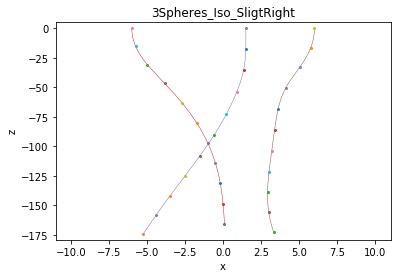

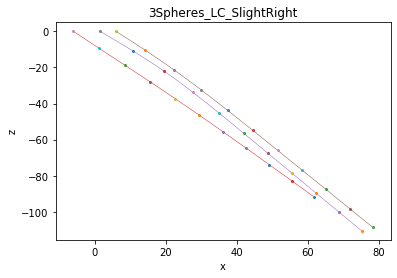

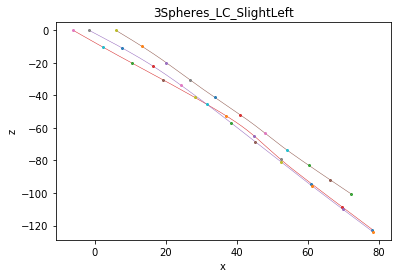

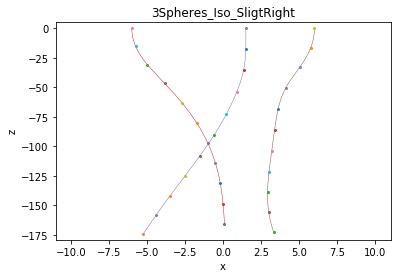

In [23]:
movie1.getStill()
movie2.getStill()
movie3.getStill()

<a id='wip'></a>
# 6. Things to Come
###### [back to top](#top)